In [11]:
# file kfkd.py
import os

import numpy as np
from pandas.io.parsers import read_csv
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [12]:
# add to kfkd.py
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet

In [13]:
from time import time

In [14]:
FTRAIN = 'C:/Users/chuco/Documents/MIDS-W207/Final_Project_FK/kaggle_data/training.csv'
FTEST = 'C:/Users/chuco/Documents/MIDS-W207/Final_Project_FK/kaggle_data/test.csv'

In [15]:
# Write function to load the data
# Normalize the target -- coordinates : current grid 96by96
# Normalize the features -- pixels : current range 255

def load(test = False, cols = None):
    """Loads data from FTEST if *test* is True, otherwise from FTRAIN. 
    Pass a list of *cols* if you're only interested in a subset of the target columns"""
    
    fname = FTEST if test else FTRAIN
    df = read_csv(os.path.expanduser(fname)) #Load pandas dataframe
    
    # The Image column has pixel values separated by space
    # convert these values to numpy arraus:
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep = ' '))
    
    if cols: # get a subset of columns
        df = df[list(cols) + ['Image']]
        
    print(df.count()) # prints the number of values for each column
    df = df.dropna() 
    # drop all rows that have missing values in them. reduce from 7049 partial to 2140 full examples
    
    # make feature matrix X
    # first convert pixel values from pandas 1D series to numpy 2D array
    # normalize pixel valuaes
    X = np.vstack(df['Image'].values)/255. # scale pixel values to [0,1]
    X = X.astype(np.float32) # make sure numeric val are float32
    # X is numpy.ndarray, shape (2140, 9216) == 7049 examples, 96 grid * 96 grid
    
    
    if not test: # only train data has target columns
        
        y = df[df.columns[:-1]].values #last column is X, we want the y targets here
        # y is numpy.ndarray, shape(2140, 30) -- 7049 examples, 30 targets each
        
        y = (y - 48) / 48 # scale target coordinates to [-1.1] (currently 96 by 96)
        X, y = shuffle(X, y, random_state = 42) #shuffle train data
        y = y.astype(np.float32)
        
    else:
        y = None # test data has no targets available
        
    return X,y

In [7]:
# Loading the data
X, y = load()

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [8]:
print("X.shape == {}; X.min == {:.3f}; X.max == {:.3f}".format(X.shape, X.min(), X.max()))
print("y.shape == {}; y.min == {:.3f}; y.max == {:.3f}".format(y.shape, y.min(), y.max()))

X.shape == (2140, 9216); X.min == 0.000; X.max == 1.000
y.shape == (2140, 30); y.min == -0.920; y.max == 0.996


## net documentation
https://pythonhosted.org/nolearn/lasagne.html

## Net Construction and Training

In [11]:
net1 = NeuralNet(
    
    layers=[ 
    #three layers: one hidden layer
    ('input', layers.InputLayer),
    ('hidden', layers.DenseLayer),
    ('output', layers.DenseLayer),
    ],
    
    #layer parameters:
    input_shape = (None, 9216), # 96by96 input pixels per batch # None -- variable batch size (?)
    hidden_num_units = 100, # number of units in hidden layer   
    output_nonlinearity = None, #output layer uses identity function
    # none means output has no special activation function, 
    # it simply gives the linear combination of the activations in the hidden layer
    output_num_units = 30, #30 target values
    # default
    # hidden_nonlinearity = rectifier max(0,x)
    
    #optimization method:
    # all parameters starting with prefix update_ parametrize the update function
    # or optimization method. The update function will update the weights of our
    # network after each batch
    update = nesterov_momentum, # this is a gradient descent optimization method, 
    # works well with many problems
    # other methods are adagrad and rmsprop
    update_learning_rate = 0.01, # how large do we want to steps to be?
    update_momentum = 0.9,
    
    #note that we didn't specify a cost function to minimize
    #so default mean squared error MSE is used
    
    regression = True, 
    #flag True to indicate we're dealing with regression problem
    # as opposed to classification
    max_epochs = 400, #we want to train this many epochs
    verbose = 1 # print out information during training
)

X,y = load()
net1.fit(X,y)     
# Running these two lines output a table that grows one row per training epoch
# Loss: MSE on training or validation set
# NeuralNet automatically split data provided in X into training and validation
# 20% for validation
# can adjust by overriding eval_size = 0.2
# generally validation error keeps improving until the end

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

    102     0.00485     0.00540    0.89887  0.04s
    103     0.00483     0.00538    0.89822  0.04s
    104     0.00481     0.00536    0.89755  0.04s
    105     0.00479     0.00534    0.89689  0.05s
    106     0.00477     0.00532    0.89624  0.04s
    107     0.00475     0.00531    0.89559  0.04s
    108     0.00473     0.00529    0.89492  0.04s
    109     0.00471     0.00527    0.89426  0.04s
    110     0.00469     0.00525    0.89358  0.04s
    111     0.00467     0.00523    0.89295  0.04s
    112     0.00465     0.00522    0.89227  0.04s
    113     0.00463     0.00520    0.89163  0.04s
    114     0.00462     0.00518    0.89098  0.04s
    115     0.00460     0.00516    0.89031  0.04s
    116     0.00458     0.00515    0.88968  0.04s
    117     0.00456     0.00513    0.88901  0.04s
    118     0.00454     0.00511    0.88838  0.05s
    119     0.00452     0.00510    0.88771  0.04s
    120     0.00451     0.00508    0.88708  0.04s
    121     0.00449     0.00506    0.88641  0.04s


    223     0.00327     0.00397    0.82307  0.04s
    224     0.00326     0.00396    0.82252  0.04s
    225     0.00325     0.00396    0.82191  0.04s
    226     0.00324     0.00395    0.82130  0.04s
    227     0.00324     0.00394    0.82076  0.04s
    228     0.00323     0.00394    0.82017  0.04s
    229     0.00322     0.00393    0.81959  0.04s
    230     0.00321     0.00392    0.81903  0.04s
    231     0.00320     0.00392    0.81840  0.04s
    232     0.00320     0.00391    0.81788  0.04s
    233     0.00319     0.00390    0.81727  0.04s
    234     0.00318     0.00390    0.81672  0.04s
    235     0.00317     0.00389    0.81610  0.04s
    236     0.00317     0.00388    0.81556  0.04s
    237     0.00316     0.00388    0.81495  0.04s
    238     0.00315     0.00387    0.81436  0.04s
    239     0.00314     0.00386    0.81384  0.04s
    240     0.00314     0.00386    0.81328  0.04s
    241     0.00313     0.00385    0.81264  0.04s
    242     0.00312     0.00384    0.81210  0.04s


    344     0.00257     0.00339    0.75743  0.04s
    345     0.00256     0.00339    0.75689  0.04s
    346     0.00256     0.00338    0.75645  0.04s
    347     0.00256     0.00338    0.75593  0.04s
    348     0.00255     0.00338    0.75544  0.04s
    349     0.00255     0.00337    0.75494  0.04s
    350     0.00254     0.00337    0.75447  0.04s
    351     0.00254     0.00337    0.75395  0.04s
    352     0.00254     0.00337    0.75347  0.04s
    353     0.00253     0.00336    0.75296  0.04s
    354     0.00253     0.00336    0.75250  0.04s
    355     0.00252     0.00336    0.75199  0.04s
    356     0.00252     0.00335    0.75145  0.04s
    357     0.00252     0.00335    0.75098  0.04s
    358     0.00251     0.00335    0.75051  0.04s
    359     0.00251     0.00335    0.74994  0.04s
    360     0.00251     0.00334    0.74956  0.04s
    361     0.00250     0.00334    0.74900  0.04s
    362     0.00250     0.00334    0.74852  0.04s
    363     0.00249     0.00333    0.74811  0.04s


NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x0000020F000A9048>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x0000020F00096FD0>,
     check_input=True, custom_scores=None, hidden_num_units=100,
     input_shape=(None, 9216),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('hidden', <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=400, more_params={},
     objective=<function objective at 0x0000020F00203BF8>,
     objective_loss_function=<function squared_error at 0x0000020F0005AD90>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog object at 0x0000020F0020D0F0>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo object at 0x0000020F0020D128>],
     output_nonlinearity=None, output_num_units=30, regression=True,
     scores

In [14]:
y.shape
#2140 examples
#each row [left_eye x, left_eye y, right_eye x, right_eye y....etc]

(2140, 30)

In [15]:
y

array([[ 0.38161111, -0.21757638, -0.40208334, ...,  0.44038889,
         0.03376389,  0.8259514 ],
       [ 0.4330242 , -0.21624877, -0.34668279, ...,  0.52398473,
        -0.08612007,  0.59259433],
       [ 0.3582826 , -0.26738405, -0.38800001, ...,  0.41946375,
        -0.01155797,  0.67042756],
       ..., 
       [ 0.40102914, -0.25295144, -0.37998059, ...,  0.38052428,
        -0.01551456,  0.75366992],
       [ 0.45343795, -0.1929708 , -0.40183941, ...,  0.72154742,
        -0.00937226,  0.89186132],
       [ 0.45054716, -0.32877925, -0.40111321, ...,  0.40483019,
         0.06266037,  0.7168113 ]], dtype=float32)

## Getting MSE for Kaggle Ranking

In [16]:
# Our validation error is 0.003255 here
# we need to convert this back 

import numpy as np
np.sqrt(0.003255)*48
# now it returns a proxy value for the Kaggle board score

2.7385251505144153

## Study Training and Validation Loss

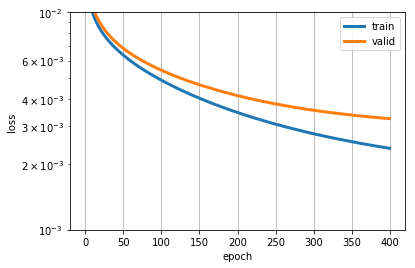

In [13]:
# object net1 keeps training history for each epoch
# we can access this record
train_loss = np.array([i["train_loss"] for i in net1.train_history_])
valid_loss = np.array([i["valid_loss"] for i in net1.train_history_])
plt.plot(train_loss, linewidth=3, label="train")
plt.plot(valid_loss, linewidth=3, label="valid")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.ylim(1e-3,1e-2)
plt.yscale("log")
plt.show()
# try epoch=1000 in net1 code to see same graph as tutorial

# we can see that our net overfits, but not too bad
# in particular, we dont see our validation error gets worse again
# so early stopping a technique commonly used to avoid over-fitting, won't be very useful
# we didnt use regularization, apart from choosing a small number of hidden neurons
# so overfitting is somewhat in control

## Plot the predictions

In [17]:
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap = 'gray')
    axis.scatter(y[0::2]*48+48, y[1::2]*48+48, marker='x', s=10)

ImageId    1783
Image      1783
dtype: int64


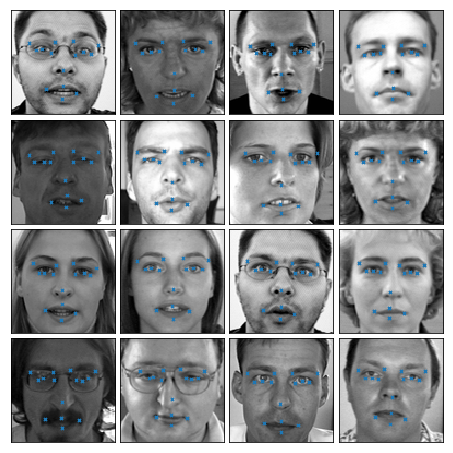

In [15]:
# load test set and predict
X, _ = load(test=True)
y_pred = net1.predict(X)

fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    plot_sample(X[i], y_pred[i], ax)
    
plt.show()

## Convolutions

Convolutional layers are different to fully connected layers; they use a few tricks to reduce the number of parameters that need to be learned, while retaining high expressiveness

+ Neurons are only connected to a subset of neurons in the previous layer
+ weight sharing: weights are shared between a subset of neurons in the convolutional layer
+ pooling: static subsampling of inputs

Units in a convolutional layer actually connect to a 2-d patch of neurons in the previous layer, a prior that lets them exploit the 2-d structure in the input.



## Turn features X from flat vector of 9216 into 3D shape (1,96,96)

In [18]:
# When using convolutional layers in Lasagne, we have to prepare the input data such 
# that each sample is no longer a flat vector of 9,216 pixel intensities, 
# but a three-dimensional matrix with shape (c, 0, 1), where c is the number of channels (colors), 
# and 0 and 1 correspond to the x and y dimensions of the input image. In our case, 
# the concrete shape will be (1, 96, 96), because we're dealing with a single (gray) color 
# channel only.

def load2d(test=False, cols=None):
    X, y = load(test=test)
    X = X.reshape(-1, 1, 96, 96)
    return X, y

## build a convolutional neural net with three convolutional layers and two fully connected layers

In [10]:
# Each conv layer is followed by a 2x2 max-pooling layer. 
# Starting with 32 filters, we double the number of filters with every conv layer. 
# The densely connected hidden layers both have 500 units.

# no regularization or dropout
# using very small convolutional filtersm such as 3x3 or 2x2, is a pretty good regularizer by itself

net2 = NeuralNet(
    layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),
        ('pool1', layers.MaxPool2DLayer),
        ('conv2', layers.Conv2DLayer),
        ('pool2', layers.MaxPool2DLayer),
        ('conv3', layers.Conv2DLayer),
        ('pool3', layers.MaxPool2DLayer),
        ('hidden4', layers.DenseLayer),
        ('hidden5', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    input_shape=(None, 1, 96, 96),
    conv1_num_filters=32, conv1_filter_size=(3, 3), pool1_pool_size=(2, 2),
    conv2_num_filters=64, conv2_filter_size=(2, 2), pool2_pool_size=(2, 2),
    conv3_num_filters=128, conv3_filter_size=(2, 2), pool3_pool_size=(2, 2),
    hidden4_num_units=500, hidden5_num_units=500,
    output_num_units=30, output_nonlinearity=None,

    update_learning_rate=0.01,
    update_momentum=0.9,

    regression=True,
    max_epochs=1000,
    verbose=1,
    )
time1 = time()
X, y = load2d()  # load 2-d data
net2.fit(X, y)
print (time()-time1)

KeyboardInterrupt: 

+ InputLayer            (None, 1, 96, 96)       produces    9216 outputs
    + 1 image of size (96 by 96)

+ Conv2DCCLayer         (None, 32, 94, 94)      produces  282752 outputs
    + 32 filters output 32 images of size (94 by 94)

+ MaxPool2DCCLayer      (None, 32, 47, 47)      produces   70688 outputs
    + 32 pooling filters output 32 images of size (47 by 47)

+ Conv2DCCLayer         (None, 64, 46, 46)      produces  135424 outputs
+ MaxPool2DCCLayer      (None, 64, 23, 23)      produces   33856 outputs
+ Conv2DCCLayer         (None, 128, 22, 22)     produces   61952 outputs
    + 128 pooling filters output 128 images of size (22 by 22)
+ MaxPool2DCCLayer      (None, 128, 11, 11)     produces   15488 outputs
    + 128 pooling filters output 128 images of size (22 by 22)
+ DenseLayer            (None, 500)             produces     500 outputs
+ DenseLayer            (None, 500)             produces     500 outputs
    + 2 hidden layers, each of 500 nodes
   
+ DenseLayer            (None, 30)              produces      30 outputs
    + output layers, 30 labels

3:03pm epoch 27
3:58pm epoch 100
4:26pm epoch 135
10:24pm epoch 593
10:51pm epoch 624

In [ ]:
# let's store this model!
import pickle
with open('net2.pickle', 'wb') as f:
    pickle.dump(net2, f, -1)

In [24]:
# net2 accuracy
np.sqrt(0.00173) * 48

1.9964768969362006

## compare net1 and net2 with problematic example

In [25]:
# problematic example : 6th image
sample1 = load(test=True)[0][6:7] #[0] to get X features, [1] to get y labels
sample2 = load2d(test=True)[0][6:7]
y_pred1 = net1.predict(sample1)[0]
y_pred2 = net2.predict(sample2)[0]

ImageId    1783
Image      1783
dtype: int64
ImageId    1783
Image      1783
dtype: int64


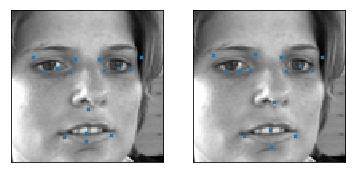

In [32]:
fig = plt.figure(figsize = (6,3))

ax = fig.add_subplot(1,2,1,xticks=[],yticks=[])
# reuse plot_sample function we wrote above
plot_sample(sample1[0], y_pred1, ax)

ax = fig.add_subplot(1,2,2,xticks=[],yticks=[])
plot_sample(sample2[0], y_pred2, ax)

plt.show()

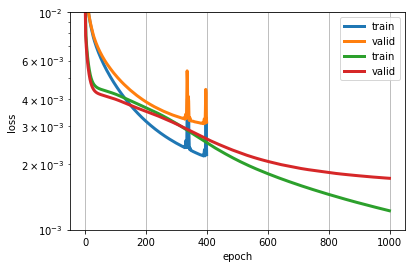

In [34]:
# object net2 keeps training history for each epoch
# we can access this record
train_loss2 = np.array([i["train_loss"] for i in net2.train_history_])
valid_loss2 = np.array([i["valid_loss"] for i in net2.train_history_])

plt.plot(train_loss, linewidth=3, label="train")
plt.plot(valid_loss, linewidth=3, label="valid")

plt.plot(train_loss2, linewidth=3, label="train")
plt.plot(valid_loss2, linewidth=3, label="valid")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.ylim(1e-3,1e-2)
plt.yscale("log")
plt.show()

## Data Augementation

In [35]:
X.shape

(2140, 1, 96, 96)

In [19]:
# flipping X images horizontally
X,y = load2d()
X_flipped = X[:,:,:,::-1] # to flip horizontally for all images, only apply ::-1 at last

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

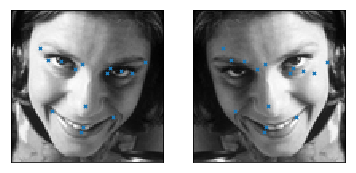

In [38]:
# plot two images!
fig = plt.figure(figsize = (6,3))
ax = fig.add_subplot(1,2,1,xticks=[],yticks=[])
plot_sample(X[1],y[1],ax)
ax = fig.add_subplot(1,2,2,xticks=[],yticks=[])
plot_sample(X_flipped[1], y[1], ax)
plt.show()
# notice that the target value for keypoints are flipped yet

In [39]:
# Define a tuple flip_indices that holds the information about which columns in the targer vector neeed to swap places
# when we flip the image horizontally

#left_eye_center_x            7034
#left_eye_center_y            7034
#right_eye_center_x           7032
#right_eye_center_y           7032
#left_eye_inner_corner_x      2266
#left_eye_inner_corner_y      2266

In [40]:
flip_indices = [
    (0, 2), (1, 3),
    (4, 8), (5, 9), (6, 10), (7, 11),
    (12, 16), (13, 17), (14, 18), (15, 19),
    (22, 24), (23, 25),
    ]

# Lets see if we got it right
df = read_csv(os.path.expanduser(FTRAIN))
for i,j in flip_indices:
    print ("# {} -> {}".format(df.columns[i], df.columns[j]))

# left_eye_center_x -> right_eye_center_x
# left_eye_center_y -> right_eye_center_y
# left_eye_inner_corner_x -> right_eye_inner_corner_x
# left_eye_inner_corner_y -> right_eye_inner_corner_y
# left_eye_outer_corner_x -> right_eye_outer_corner_x
# left_eye_outer_corner_y -> right_eye_outer_corner_y
# left_eyebrow_inner_end_x -> right_eyebrow_inner_end_x
# left_eyebrow_inner_end_y -> right_eyebrow_inner_end_y
# left_eyebrow_outer_end_x -> right_eyebrow_outer_end_x
# left_eyebrow_outer_end_y -> right_eyebrow_outer_end_y
# mouth_left_corner_x -> mouth_right_corner_x
# mouth_left_corner_y -> mouth_right_corner_y


In [20]:
from nolearn.lasagne import BatchIterator

In [21]:
class FlipBatchIterator(BatchIterator):
    flip_indices = [
        (0, 2), (1, 3),
        (4, 8), (5, 9), (6, 10), (7, 11),
        (12, 16), (13, 17), (14, 18), (15, 19),
        (22, 24), (23, 25),
        ]

    def transform(self, Xb, yb):
        Xb, yb = super(FlipBatchIterator, self).transform(Xb, yb)

        # Flip half of the images in this batch at random:
        bs = Xb.shape[0] #number of examples
        indices = np.random.choice(bs, bs // 2, replace=False) #choose half of them randomly
        Xb[indices] = Xb[indices, :, :, ::-1] #flip these guys randomly

        if yb is not None:
            # Horizontal flip of all x coordinates:
            yb[indices, ::2] = yb[indices, ::2] * -1

            # Swap places, e.g. left_eye_center_x -> right_eye_center_x
            for a, b in self.flip_indices:
                yb[indices, a], yb[indices, b] = (
                    yb[indices, b], yb[indices, a])

        return Xb, yb

In [22]:
net3 = NeuralNet(
    
    layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),
        ('pool1', layers.MaxPool2DLayer),
        ('conv2', layers.Conv2DLayer),
        ('pool2', layers.MaxPool2DLayer),
        ('conv3', layers.Conv2DLayer),
        ('pool3', layers.MaxPool2DLayer),
        ('hidden4', layers.DenseLayer),
        ('hidden5', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    input_shape=(None, 1, 96, 96),
    conv1_num_filters=32, conv1_filter_size=(3, 3), pool1_pool_size=(2, 2),
    conv2_num_filters=64, conv2_filter_size=(2, 2), pool2_pool_size=(2, 2),
    conv3_num_filters=128, conv3_filter_size=(2, 2), pool3_pool_size=(2, 2),
    hidden4_num_units=500, hidden5_num_units=500,
    output_num_units=30, output_nonlinearity=None,

    update_learning_rate=0.01,
    update_momentum=0.9,
    regression=True,
    batch_iterator_train=FlipBatchIterator(batch_size=128),
    max_epochs=3000,
    verbose=1,
    )

In [51]:
# from time import time
t0 = time()
net3.fit(X, y)
print (time() - t0)
# While each one of our training epochs will still look at the same number of 
# examples as before (after all, we haven't changed the size of X), it turns out 
# that training nevertheless takes quite a bit longer when we use our transforming 
# FlipBatchIterator. This is because what the network learns generalizes better this time, 
# and it's arguably harder to learn things that generalize than to overfit.

# Neural Network with 8051502 learnable parameters

## Layer information

  #  name     size
---  -------  ---------
  0  input    1x96x96
  1  conv1    32x94x94
  2  pool1    32x47x47
  3  conv2    64x46x46
  4  pool2    64x23x23
  5  conv3    128x22x22
  6  pool3    128x11x11
  7  hidden4  500
  8  hidden5  500
  9  output   30

  epoch    trn loss    val loss    trn/val  dur
-------  ----------  ----------  ---------  ------
      1     0.07281     0.01858    3.91870  39.14s
      2     0.01284     0.00987    1.30049  48.48s
      3     0.00890     0.00800    1.11283  49.10s
      4     0.00800     0.00742    1.07738  50.66s
      5     0.00750     0.00701    1.07017  50.43s
      6     0.00711     0.00665    1.06932  52.33s
      7     0.00680     0.00635    1.07084  52.50s
      8     0.00652     0.00610    1.06907  50.55s
      9     0.00627     0.00588    1.06701  52.16s
     10     0.00607     0.00568    1.06952  53.47s
     11     0.00589     0.00550    1.07118  51.15s
     12

    119     0.00415     0.00392    1.05922  56.18s
    120     0.00414     0.00391    1.05985  60.63s
    121     0.00413     0.00393    1.05065  55.84s
    122     0.00414     0.00391    1.06028  47.57s
    123     0.00414     0.00389    1.06266  49.52s
    124     0.00413     0.00390    1.05823  68.08s
    125     0.00413     0.00389    1.06196  62.00s
    126     0.00412     0.00389    1.06126  67.34s
    127     0.00412     0.00389    1.05900  62.46s
    128     0.00411     0.00389    1.05794  61.93s
    129     0.00410     0.00388    1.05605  61.58s
    130     0.00411     0.00388    1.05983  77.86s
    131     0.00410     0.00387    1.05887  79.09s
    132     0.00409     0.00387    1.05801  75.32s
    133     0.00409     0.00387    1.05669  71.20s
    134     0.00409     0.00386    1.05892  63.54s
    135     0.00408     0.00385    1.06048  63.07s
    136     0.00408     0.00385    1.05867  62.68s
    137     0.00407     0.00384    1.05990  64.87s
    138     0.00407     0.00386

    245     0.00355     0.00339    1.04824  47.21s
    246     0.00355     0.00338    1.04882  45.54s
    247     0.00353     0.00338    1.04618  47.54s
    248     0.00353     0.00337    1.04816  49.05s
    249     0.00352     0.00338    1.04394  49.22s
    250     0.00352     0.00337    1.04540  48.26s
    251     0.00351     0.00336    1.04617  46.81s
    252     0.00351     0.00335    1.04690  46.51s
    253     0.00350     0.00336    1.04394  47.03s
    254     0.00349     0.00334    1.04625  47.34s
    255     0.00350     0.00334    1.04823  51.83s
    256     0.00348     0.00334    1.04265  48.50s
    257     0.00348     0.00333    1.04531  53.65s
    258     0.00347     0.00333    1.04314  51.39s
    259     0.00347     0.00331    1.04600  47.51s
    260     0.00346     0.00332    1.04273  48.33s
    261     0.00347     0.00331    1.04832  48.01s
    262     0.00346     0.00330    1.04664  48.86s
    263     0.00345     0.00331    1.04296  49.02s
    264     0.00344     0.00329

    371     0.00278     0.00275    1.01194  48.60s
    372     0.00277     0.00274    1.01148  49.18s
    373     0.00276     0.00273    1.01041  48.98s
    374     0.00276     0.00273    1.00864  49.20s
    375     0.00276     0.00273    1.01086  49.08s
    376     0.00276     0.00273    1.00962  49.76s
    377     0.00274     0.00272    1.01065  59.75s
    378     0.00272     0.00272    1.00224  57.97s
    379     0.00273     0.00271    1.00925  61.17s
    380     0.00272     0.00271    1.00479  58.36s
    381     0.00272     0.00271    1.00325  54.93s
    382     0.00271     0.00269    1.00659  54.73s
    383     0.00270     0.00269    1.00551  53.88s
    384     0.00270     0.00268    1.00618  51.49s
    385     0.00270     0.00268    1.00727  57.10s
    386     0.00269     0.00267    1.00502  55.47s
    387     0.00268     0.00266    1.00443  62.42s
    388     0.00267     0.00266    1.00319  60.59s
    389     0.00267     0.00266    1.00354  56.67s
    390     0.00266     0.00265

    497     0.00215     0.00225    0.95836  49.66s
    498     0.00216     0.00224    0.96280  49.52s
    499     0.00215     0.00224    0.96172  50.01s
    500     0.00215     0.00223    0.96226  49.26s
    501     0.00215     0.00223    0.96042  49.45s
    502     0.00215     0.00223    0.96326  50.84s
    503     0.00214     0.00223    0.95890  50.30s
    504     0.00214     0.00223    0.95894  46.41s
    505     0.00213     0.00222    0.95843  46.70s
    506     0.00214     0.00222    0.96125  45.94s
    507     0.00212     0.00222    0.95615  46.43s
    508     0.00213     0.00221    0.96253  45.59s
    509     0.00213     0.00222    0.95922  46.78s
    510     0.00212     0.00221    0.95766  46.22s
    511     0.00212     0.00221    0.95811  46.67s
    512     0.00210     0.00221    0.95178  46.32s
    513     0.00210     0.00221    0.95341  46.30s
    514     0.00210     0.00220    0.95394  45.92s
    515     0.00211     0.00220    0.95921  45.99s
    516     0.00210     0.00219

    627     0.00183     0.00198    0.92507  45.24s
    628     0.00183     0.00198    0.92400  45.10s
    629     0.00183     0.00198    0.92460  45.92s
    630     0.00181     0.00198    0.91814  45.68s
    631     0.00182     0.00197    0.92021  45.49s
    632     0.00182     0.00197    0.92175  45.65s
    633     0.00182     0.00197    0.92195  45.99s
    634     0.00182     0.00197    0.92247  45.42s
    635     0.00181     0.00197    0.92137  45.29s
    636     0.00180     0.00197    0.91707  45.14s
    637     0.00180     0.00196    0.91657  45.74s
    638     0.00181     0.00197    0.92198  45.82s
    639     0.00181     0.00197    0.91867  45.17s
    640     0.00181     0.00196    0.92283  45.73s
    641     0.00180     0.00196    0.92090  45.40s
    642     0.00180     0.00196    0.92006  45.99s
    643     0.00180     0.00196    0.91700  45.53s
    644     0.00180     0.00196    0.91820  46.14s
    645     0.00179     0.00196    0.91385  45.63s
    646     0.00179     0.00196

    765     0.00162     0.00183    0.88495  44.01s
    766     0.00161     0.00183    0.88257  43.69s
    767     0.00160     0.00182    0.88048  43.37s
    768     0.00161     0.00183    0.87928  43.39s
    769     0.00161     0.00182    0.88277  43.30s
    770     0.00160     0.00182    0.88065  42.95s
    771     0.00161     0.00182    0.88722  43.74s
    772     0.00161     0.00182    0.88457  43.29s
    773     0.00161     0.00182    0.88439  43.48s
    774     0.00161     0.00182    0.88212  43.32s
    775     0.00161     0.00181    0.88689  43.31s
    776     0.00160     0.00181    0.88133  42.85s
    777     0.00160     0.00182    0.88112  43.35s
    778     0.00160     0.00182    0.88086  43.13s
    779     0.00160     0.00182    0.88112  43.09s
    780     0.00159     0.00181    0.87723  43.17s
    781     0.00160     0.00181    0.88009  43.05s
    782     0.00159     0.00181    0.87960  43.58s
    783     0.00159     0.00181    0.88089  43.24s
    784     0.00159     0.00181

    908     0.00147     0.00172    0.85314  42.93s
    909     0.00145     0.00172    0.84440  42.66s
    910     0.00145     0.00172    0.84477  42.52s
    911     0.00146     0.00172    0.85063  42.45s
    912     0.00146     0.00172    0.84645  42.58s
    913     0.00145     0.00173    0.84205  42.22s
    914     0.00146     0.00172    0.84615  42.71s
    915     0.00145     0.00172    0.84763  42.65s
    916     0.00145     0.00172    0.84513  42.28s
    917     0.00146     0.00172    0.84617  42.87s
    918     0.00145     0.00172    0.84086  42.62s
    919     0.00145     0.00172    0.84346  42.58s
    920     0.00145     0.00172    0.84417  42.94s
    921     0.00145     0.00172    0.84104  42.75s
    922     0.00145     0.00172    0.84247  43.62s
    923     0.00144     0.00172    0.84210  43.04s
    924     0.00144     0.00171    0.84215  43.32s
    925     0.00144     0.00171    0.84146  42.45s
    926     0.00145     0.00171    0.84974  42.95s
    927     0.00144     0.00171

   1054     0.00134     0.00165    0.81345  43.18s
   1055     0.00135     0.00165    0.81688  42.96s
   1056     0.00134     0.00165    0.81650  42.76s
   1057     0.00134     0.00165    0.81163  43.50s
   1058     0.00134     0.00165    0.81312  43.81s
   1059     0.00134     0.00164    0.81380  42.57s
   1060     0.00134     0.00165    0.81180  43.09s
   1061     0.00134     0.00164    0.81287  43.55s
   1062     0.00133     0.00164    0.80782  43.34s
   1063     0.00133     0.00164    0.81340  42.92s
   1064     0.00133     0.00164    0.81149  43.52s
   1065     0.00133     0.00164    0.81317  42.97s
   1066     0.00134     0.00164    0.81510  42.94s
   1067     0.00133     0.00164    0.81151  43.17s
   1068     0.00133     0.00164    0.81030  43.00s
   1069     0.00134     0.00164    0.81562  43.18s
   1070     0.00133     0.00164    0.81546  42.46s
   1071     0.00134     0.00163    0.81868  43.40s
   1072     0.00133     0.00164    0.81075  42.87s
   1073     0.00133     0.00163

   1202     0.00124     0.00158    0.78205  42.90s
   1203     0.00125     0.00159    0.78777  42.99s
   1204     0.00125     0.00158    0.78888  42.94s
   1205     0.00124     0.00159    0.77941  42.84s
   1206     0.00124     0.00158    0.78720  43.19s
   1207     0.00124     0.00158    0.78610  43.02s
   1208     0.00124     0.00158    0.78558  42.70s
   1209     0.00124     0.00158    0.78099  43.12s
   1210     0.00124     0.00158    0.78719  43.50s
   1211     0.00124     0.00158    0.78231  42.72s
   1212     0.00125     0.00158    0.79058  42.83s
   1213     0.00124     0.00158    0.78305  42.99s
   1214     0.00123     0.00158    0.77919  43.00s
   1215     0.00123     0.00158    0.78145  43.60s
   1216     0.00123     0.00158    0.77997  43.16s
   1217     0.00123     0.00158    0.78143  43.11s
   1218     0.00123     0.00158    0.78226  42.95s
   1219     0.00124     0.00158    0.78457  43.21s
   1220     0.00124     0.00158    0.78355  42.96s
   1221     0.00123     0.00158

   1351     0.00116     0.00153    0.75457  43.35s
   1352     0.00115     0.00153    0.75428  43.52s
   1353     0.00116     0.00153    0.75911  43.70s
   1354     0.00116     0.00154    0.75427  43.01s
   1355     0.00116     0.00153    0.75631  43.76s
   1356     0.00116     0.00153    0.76058  43.74s
   1357     0.00115     0.00153    0.75204  43.91s
   1358     0.00116     0.00153    0.75425  43.62s
   1359     0.00116     0.00153    0.75809  43.61s
   1360     0.00115     0.00154    0.75148  43.85s
   1361     0.00116     0.00153    0.75600  43.41s
   1362     0.00116     0.00153    0.75850  43.67s
   1363     0.00116     0.00153    0.75340  43.91s
   1364     0.00116     0.00153    0.75472  43.55s
   1365     0.00116     0.00153    0.75726  43.22s
   1366     0.00116     0.00153    0.75496  43.55s
   1367     0.00115     0.00153    0.75027  43.42s
   1368     0.00116     0.00153    0.75629  43.95s
   1369     0.00115     0.00153    0.75531  43.42s
   1370     0.00116     0.00153

   1502     0.00109     0.00149    0.72944  43.70s
   1503     0.00109     0.00149    0.73334  42.95s
   1504     0.00109     0.00149    0.73570  43.93s
   1505     0.00108     0.00149    0.72696  43.68s
   1506     0.00109     0.00149    0.72930  43.80s
   1507     0.00109     0.00149    0.73249  43.54s
   1508     0.00109     0.00149    0.72998  43.94s
   1509     0.00109     0.00149    0.72784  43.50s
   1510     0.00108     0.00149    0.72785  44.26s
   1511     0.00109     0.00149    0.73098  43.53s
   1512     0.00109     0.00149    0.72854  43.49s
   1513     0.00108     0.00149    0.72650  43.56s
   1514     0.00109     0.00149    0.72786  43.46s
   1515     0.00109     0.00149    0.73046  43.88s
   1516     0.00109     0.00149    0.72974  43.68s
   1517     0.00109     0.00149    0.73169  44.30s
   1518     0.00109     0.00149    0.72962  43.49s
   1519     0.00108     0.00149    0.72829  43.41s
   1520     0.00109     0.00149    0.73053  43.92s
   1521     0.00108     0.00148

   1654     0.00103     0.00145    0.70889  44.24s
   1655     0.00103     0.00145    0.70927  45.04s
   1656     0.00103     0.00145    0.70748  44.24s
   1657     0.00103     0.00146    0.70364  44.61s
   1658     0.00103     0.00146    0.70566  44.22s
   1659     0.00102     0.00146    0.69980  44.38s
   1660     0.00103     0.00145    0.70976  44.29s
   1661     0.00103     0.00145    0.70742  44.18s
   1662     0.00103     0.00145    0.71240  44.34s
   1663     0.00102     0.00146    0.70223  44.56s
   1664     0.00102     0.00145    0.70660  44.72s
   1665     0.00103     0.00146    0.70278  44.15s
   1666     0.00103     0.00145    0.70646  44.92s
   1667     0.00103     0.00145    0.71201  44.28s
   1668     0.00102     0.00145    0.70473  44.47s
   1669     0.00103     0.00146    0.70535  44.17s
   1670     0.00103     0.00145    0.70954  44.30s
   1671     0.00102     0.00145    0.69881  44.01s
   1672     0.00102     0.00145    0.70238  44.25s
   1673     0.00101     0.00145

   1807     0.00098     0.00143    0.68643  44.73s
   1808     0.00098     0.00143    0.68480  44.47s
   1809     0.00098     0.00142    0.68651  45.25s
   1810     0.00097     0.00143    0.67888  44.69s
   1811     0.00097     0.00142    0.68403  44.56s
   1812     0.00097     0.00143    0.67901  44.77s
   1813     0.00097     0.00142    0.68047  45.04s
   1814     0.00097     0.00143    0.67891  44.69s
   1815     0.00097     0.00143    0.68255  44.73s
   1816     0.00097     0.00142    0.68332  44.81s
   1817     0.00097     0.00142    0.68491  44.72s
   1818     0.00097     0.00142    0.68553  44.92s
   1819     0.00097     0.00143    0.68289  44.44s
   1820     0.00097     0.00143    0.67971  44.35s
   1821     0.00097     0.00143    0.67709  44.87s
   1822     0.00097     0.00142    0.68375  45.41s
   1823     0.00097     0.00143    0.67712  44.80s
   1824     0.00097     0.00143    0.67528  44.49s
   1825     0.00097     0.00142    0.68485  45.06s
   1826     0.00097     0.00143

   1960     0.00092     0.00140    0.66099  44.83s
   1961     0.00092     0.00140    0.66072  46.05s
   1962     0.00093     0.00140    0.66478  45.20s
   1963     0.00092     0.00140    0.65975  45.56s
   1964     0.00092     0.00140    0.66036  45.02s
   1965     0.00092     0.00140    0.65549  45.14s
   1966     0.00093     0.00140    0.66265  44.82s
   1967     0.00092     0.00140    0.65866  44.61s
   1968     0.00092     0.00140    0.65806  44.87s
   1969     0.00092     0.00140    0.65874  44.87s
   1970     0.00093     0.00140    0.66392  44.54s
   1971     0.00092     0.00140    0.65697  44.92s
   1972     0.00092     0.00140    0.66015  44.79s
   1973     0.00092     0.00140    0.65796  44.93s
   1974     0.00093     0.00140    0.66065  44.98s
   1975     0.00093     0.00141    0.65709  45.04s
   1976     0.00092     0.00140    0.65710  45.10s
   1977     0.00092     0.00140    0.65657  44.97s
   1978     0.00092     0.00140    0.65799  44.61s
   1979     0.00092     0.00140

   2114     0.00088     0.00138    0.63761  45.25s
   2115     0.00089     0.00138    0.64163  45.14s
   2116     0.00088     0.00138    0.63753  44.82s
   2117     0.00088     0.00138    0.63877  45.24s
   2118     0.00088     0.00138    0.63900  45.26s
   2119     0.00088     0.00138    0.63788  44.68s
   2120     0.00088     0.00138    0.63773  45.01s
   2121     0.00088     0.00138    0.63648  44.65s
   2122     0.00088     0.00138    0.64031  45.35s
   2123     0.00088     0.00138    0.64248  44.81s
   2124     0.00088     0.00138    0.64179  44.40s
   2125     0.00088     0.00138    0.63623  44.83s
   2126     0.00088     0.00138    0.64055  44.75s
   2127     0.00088     0.00138    0.63984  44.95s
   2128     0.00088     0.00138    0.63312  45.01s
   2129     0.00088     0.00138    0.64123  45.05s
   2130     0.00088     0.00138    0.63610  44.41s
   2131     0.00088     0.00138    0.63754  44.90s
   2132     0.00088     0.00138    0.63924  44.85s
   2133     0.00087     0.00138

   2269     0.00084     0.00137    0.61804  47.80s
   2270     0.00084     0.00137    0.61765  48.95s
   2271     0.00084     0.00137    0.61581  48.92s
   2272     0.00084     0.00136    0.61492  46.81s
   2273     0.00085     0.00136    0.61950  46.61s
   2274     0.00085     0.00136    0.62237  47.32s
   2275     0.00084     0.00136    0.61935  46.75s
   2276     0.00084     0.00137    0.61226  47.36s
   2277     0.00084     0.00136    0.61576  47.69s
   2278     0.00084     0.00137    0.61443  47.24s
   2279     0.00084     0.00136    0.61694  47.94s
   2280     0.00085     0.00137    0.61618  48.64s
   2281     0.00084     0.00136    0.61850  48.64s
   2282     0.00084     0.00135    0.61844  48.07s
   2283     0.00084     0.00136    0.61604  47.71s
   2284     0.00084     0.00136    0.61852  46.99s
   2285     0.00084     0.00137    0.61277  47.24s
   2286     0.00084     0.00136    0.61622  55.59s
   2287     0.00084     0.00136    0.61873  50.74s
   2288     0.00084     0.00136

   2424     0.00080     0.00135    0.59445  47.69s
   2425     0.00081     0.00134    0.59968  47.29s
   2426     0.00080     0.00135    0.59497  46.99s
   2427     0.00080     0.00134    0.59613  47.43s
   2428     0.00081     0.00135    0.59887  47.67s
   2429     0.00080     0.00135    0.59738  46.75s
   2430     0.00080     0.00135    0.59526  47.24s
   2431     0.00080     0.00134    0.59799  47.26s
   2432     0.00080     0.00135    0.59629  47.66s
   2433     0.00080     0.00135    0.59550  47.49s
   2434     0.00080     0.00135    0.59565  47.41s
   2435     0.00081     0.00134    0.60149  47.19s
   2436     0.00080     0.00135    0.59441  46.78s
   2437     0.00080     0.00134    0.59483  47.14s
   2438     0.00081     0.00134    0.60019  47.72s
   2439     0.00080     0.00134    0.59594  47.56s
   2440     0.00080     0.00134    0.59713  47.27s
   2441     0.00080     0.00134    0.59506  47.13s
   2442     0.00080     0.00134    0.59777  47.13s
   2443     0.00079     0.00134

   2581     0.00077     0.00133    0.58085  44.05s
   2582     0.00077     0.00133    0.58123  44.38s
   2583     0.00077     0.00133    0.58019  45.63s
   2584     0.00077     0.00133    0.58104  44.69s
   2585     0.00077     0.00133    0.57972  44.41s
   2586     0.00077     0.00133    0.58061  44.74s
   2587     0.00077     0.00133    0.58337  44.71s
   2588     0.00076     0.00133    0.57478  44.06s
   2589     0.00077     0.00133    0.57892  44.13s
   2590     0.00077     0.00133    0.57548  44.00s
   2591     0.00077     0.00133    0.58315  44.34s
   2592     0.00077     0.00133    0.57788  44.10s
   2593     0.00077     0.00133    0.57579  44.71s
   2594     0.00077     0.00132    0.58169  44.44s
   2595     0.00076     0.00133    0.57477  44.03s
   2596     0.00076     0.00133    0.57357  44.29s
   2597     0.00077     0.00133    0.57814  44.95s
   2598     0.00077     0.00133    0.57676  44.16s
   2599     0.00077     0.00133    0.57698  44.99s
   2600     0.00077     0.00133

   2736     0.00074     0.00131    0.56202  45.23s
   2737     0.00074     0.00132    0.56032  44.74s
   2738     0.00074     0.00133    0.55640  45.16s
   2739     0.00074     0.00132    0.55635  44.68s
   2740     0.00074     0.00132    0.55721  44.66s
   2741     0.00074     0.00132    0.55773  45.10s
   2742     0.00074     0.00131    0.56479  45.15s
   2743     0.00074     0.00132    0.55748  44.86s
   2744     0.00074     0.00132    0.55770  45.41s
   2745     0.00074     0.00132    0.56000  45.03s
   2746     0.00073     0.00133    0.55280  45.05s
   2747     0.00074     0.00132    0.55982  44.94s
   2748     0.00074     0.00131    0.56065  44.86s
   2749     0.00074     0.00131    0.56070  45.44s
   2750     0.00074     0.00132    0.56258  44.97s
   2751     0.00074     0.00132    0.55958  45.31s
   2752     0.00073     0.00132    0.55808  44.96s
   2753     0.00074     0.00132    0.56021  45.27s
   2754     0.00073     0.00133    0.55267  45.17s
   2755     0.00074     0.00132

   2891     0.00072     0.00131    0.54701  44.81s
   2892     0.00071     0.00131    0.54316  45.55s
   2893     0.00071     0.00131    0.54182  45.27s
   2894     0.00071     0.00131    0.54314  45.80s
   2895     0.00071     0.00131    0.54098  45.91s
   2896     0.00071     0.00131    0.54337  45.40s
   2897     0.00071     0.00131    0.54180  45.07s
   2898     0.00071     0.00131    0.54298  44.83s
   2899     0.00071     0.00130    0.54168  45.09s
   2900     0.00070     0.00131    0.53906  45.22s
   2901     0.00071     0.00131    0.53970  45.64s
   2902     0.00071     0.00131    0.53721  44.66s
   2903     0.00071     0.00131    0.54025  44.98s
   2904     0.00071     0.00130    0.54231  46.47s
   2905     0.00071     0.00131    0.54016  45.42s
   2906     0.00070     0.00131    0.53789  45.23s
   2907     0.00071     0.00131    0.54330  45.73s
   2908     0.00070     0.00131    0.53813  45.62s
   2909     0.00071     0.00131    0.54147  45.11s
   2910     0.00070     0.00131

In [23]:
# try again to test GPU
t0 = time()
net3.fit(X, y)
print (time() - t0)

# Neural Network with 8051502 learnable parameters

## Layer information

  #  name     size
---  -------  ---------
  0  input    1x96x96
  1  conv1    32x94x94
  2  pool1    32x47x47
  3  conv2    64x46x46
  4  pool2    64x23x23
  5  conv3    128x22x22
  6  pool3    128x11x11
  7  hidden4  500
  8  hidden5  500
  9  output   30

  epoch    trn loss    val loss    trn/val  dur
-------  ----------  ----------  ---------  -----
      1     0.12036     0.05347    2.25089  7.63s
      2     0.02166     0.00794    2.72942  6.50s
      3     0.00816     0.00687    1.18673  6.51s
      4     0.00683     0.00635    1.07653  6.51s
      5     0.00643     0.00602    1.06817  6.51s
      6     0.00618     0.00582    1.06136  6.52s
      7     0.00599     0.00564    1.06334  6.53s
      8     0.00583     0.00549    1.06172  6.53s
      9     0.00569     0.00535    1.06289  6.53s
     10     0.00556     0.00523    1.06415  6.52s
     11     0.00545     0.00513    1.06370  6.52s
     12     0.00536

    122     0.00426     0.00401    1.06101  6.51s
    123     0.00426     0.00402    1.05939  6.50s
    124     0.00425     0.00402    1.05749  6.49s
    125     0.00424     0.00401    1.05793  6.51s
    126     0.00424     0.00401    1.05818  6.50s
    127     0.00424     0.00400    1.06049  6.51s
    128     0.00423     0.00399    1.06075  6.51s
    129     0.00423     0.00399    1.05991  6.50s
    130     0.00422     0.00400    1.05693  6.53s
    131     0.00422     0.00397    1.06199  6.52s
    132     0.00421     0.00397    1.06087  6.51s
    133     0.00421     0.00398    1.05813  6.49s
    134     0.00420     0.00396    1.06048  6.50s
    135     0.00420     0.00396    1.06044  6.49s
    136     0.00418     0.00397    1.05354  6.50s
    137     0.00419     0.00395    1.06082  6.49s
    138     0.00418     0.00395    1.05836  6.49s
    139     0.00418     0.00394    1.05912  6.51s
    140     0.00417     0.00395    1.05665  6.49s
    141     0.00417     0.00393    1.05935  6.50s


    249     0.00348     0.00335    1.03937  6.50s
    250     0.00349     0.00334    1.04477  6.49s
    251     0.00347     0.00332    1.04614  6.50s
    252     0.00346     0.00332    1.04102  6.49s
    253     0.00345     0.00331    1.04503  6.49s
    254     0.00345     0.00331    1.04189  6.50s
    255     0.00344     0.00330    1.04313  6.49s
    256     0.00344     0.00329    1.04573  6.50s
    257     0.00343     0.00330    1.03973  6.49s
    258     0.00342     0.00330    1.03729  6.49s
    259     0.00341     0.00327    1.04219  6.49s
    260     0.00340     0.00327    1.04085  6.49s
    261     0.00339     0.00327    1.03680  6.50s
    262     0.00339     0.00326    1.03819  6.49s
    263     0.00339     0.00325    1.04204  6.50s
    264     0.00338     0.00324    1.04135  6.49s
    265     0.00337     0.00324    1.03991  6.49s
    266     0.00336     0.00323    1.03951  6.49s
    267     0.00335     0.00322    1.04204  6.49s
    268     0.00335     0.00322    1.04023  6.50s


    375     0.00251     0.00251    1.00098  6.49s
    376     0.00250     0.00250    0.99785  6.50s
    377     0.00249     0.00249    0.99920  6.49s
    378     0.00248     0.00249    0.99377  6.50s
    379     0.00248     0.00248    0.99697  6.49s
    380     0.00247     0.00248    0.99453  6.49s
    381     0.00246     0.00248    0.99029  6.50s
    382     0.00246     0.00247    0.99609  6.49s
    383     0.00245     0.00246    0.99408  6.49s
    384     0.00245     0.00246    0.99631  6.50s
    385     0.00244     0.00246    0.99246  6.50s
    386     0.00244     0.00245    0.99693  6.49s
    387     0.00243     0.00244    0.99220  6.49s
    388     0.00243     0.00244    0.99729  6.50s
    389     0.00242     0.00242    0.99701  6.49s
    390     0.00241     0.00242    0.99402  6.50s
    391     0.00241     0.00242    0.99471  6.49s
    392     0.00239     0.00241    0.99072  6.50s
    393     0.00239     0.00241    0.99160  6.49s
    394     0.00239     0.00241    0.99476  6.51s


    504     0.00193     0.00203    0.95350  6.50s
    505     0.00193     0.00203    0.95369  6.49s
    506     0.00194     0.00202    0.95721  6.49s
    507     0.00194     0.00202    0.95970  6.49s
    508     0.00192     0.00202    0.95146  6.50s
    509     0.00193     0.00202    0.95638  6.49s
    510     0.00195     0.00201    0.96745  6.50s
    511     0.00193     0.00201    0.95863  6.49s
    512     0.00191     0.00201    0.95048  6.50s
    513     0.00191     0.00201    0.95008  6.50s
    514     0.00192     0.00201    0.95558  6.49s
    515     0.00191     0.00201    0.95184  6.50s
    516     0.00191     0.00200    0.95445  6.49s
    517     0.00191     0.00200    0.95475  6.50s
    518     0.00192     0.00200    0.95828  6.49s
    519     0.00190     0.00199    0.95452  6.49s
    520     0.00190     0.00199    0.95150  6.49s
    521     0.00190     0.00199    0.95545  6.49s
    522     0.00190     0.00199    0.95531  6.49s
    523     0.00190     0.00199    0.95374  6.49s


    640     0.00167     0.00182    0.91613  6.49s
    641     0.00167     0.00182    0.91579  6.49s
    642     0.00167     0.00182    0.91516  6.50s
    643     0.00167     0.00182    0.91649  6.49s
    644     0.00167     0.00182    0.91821  6.49s
    645     0.00166     0.00182    0.91243  6.49s
    646     0.00166     0.00182    0.91475  6.50s
    647     0.00166     0.00182    0.91061  6.49s
    648     0.00166     0.00182    0.91202  6.49s
    649     0.00166     0.00182    0.91478  6.50s
    650     0.00165     0.00181    0.91197  6.49s
    651     0.00166     0.00182    0.91343  6.49s
    652     0.00165     0.00181    0.91000  6.49s
    653     0.00165     0.00181    0.91082  6.49s
    654     0.00165     0.00181    0.91099  6.49s
    655     0.00165     0.00182    0.90852  6.50s
    656     0.00165     0.00181    0.90876  6.49s
    657     0.00165     0.00181    0.91113  6.49s
    658     0.00165     0.00181    0.91108  6.50s
    659     0.00164     0.00181    0.90636  6.49s


    781     0.00150     0.00171    0.88208  6.51s
    782     0.00150     0.00171    0.87939  6.62s
    783     0.00150     0.00171    0.87471  6.56s
    784     0.00150     0.00170    0.88062  6.53s
    785     0.00150     0.00170    0.87968  6.51s
    786     0.00149     0.00170    0.87761  6.50s
    787     0.00150     0.00170    0.88196  6.50s
    788     0.00149     0.00170    0.87752  6.49s
    789     0.00150     0.00170    0.88190  6.50s
    790     0.00149     0.00170    0.87787  6.49s
    791     0.00149     0.00170    0.87914  6.49s
    792     0.00149     0.00170    0.87850  6.50s
    793     0.00150     0.00170    0.88105  6.49s
    794     0.00149     0.00170    0.87592  6.50s
    795     0.00149     0.00170    0.87720  6.49s
    796     0.00149     0.00169    0.87804  6.51s
    797     0.00149     0.00170    0.87531  6.49s
    798     0.00149     0.00170    0.87503  6.49s
    799     0.00149     0.00169    0.87723  6.49s
    800     0.00148     0.00169    0.87443  6.49s


    929     0.00138     0.00162    0.84906  6.55s
    930     0.00137     0.00163    0.84100  6.56s
    931     0.00137     0.00162    0.84414  6.55s
    932     0.00137     0.00162    0.84728  6.54s
    933     0.00137     0.00162    0.84547  6.50s
    934     0.00136     0.00162    0.83869  6.53s
    935     0.00137     0.00162    0.84579  6.56s
    936     0.00137     0.00162    0.84302  6.57s
    937     0.00137     0.00162    0.84909  6.51s
    938     0.00136     0.00162    0.84252  6.50s
    939     0.00137     0.00162    0.84437  6.50s
    940     0.00137     0.00162    0.84378  6.50s
    941     0.00136     0.00162    0.83939  6.50s
    942     0.00136     0.00162    0.83994  6.50s
    943     0.00136     0.00162    0.84044  6.52s
    944     0.00136     0.00162    0.84319  6.52s
    945     0.00136     0.00162    0.84291  6.55s
    946     0.00135     0.00161    0.83907  6.54s
    947     0.00136     0.00162    0.83976  6.53s
    948     0.00136     0.00161    0.83993  6.49s


   1077     0.00127     0.00156    0.81653  6.50s
   1078     0.00127     0.00156    0.81603  6.50s
   1079     0.00127     0.00156    0.81499  6.49s
   1080     0.00127     0.00156    0.81377  6.50s
   1081     0.00127     0.00156    0.81439  6.49s
   1082     0.00127     0.00156    0.81820  6.49s
   1083     0.00126     0.00156    0.81153  6.50s
   1084     0.00127     0.00156    0.81449  6.49s
   1085     0.00126     0.00155    0.81365  6.51s
   1086     0.00126     0.00155    0.81368  6.50s
   1087     0.00127     0.00156    0.81354  6.50s
   1088     0.00127     0.00156    0.81220  6.50s
   1089     0.00126     0.00155    0.81252  6.49s
   1090     0.00126     0.00156    0.80709  6.51s
   1091     0.00126     0.00155    0.81386  6.50s
   1092     0.00127     0.00155    0.81586  6.50s
   1093     0.00127     0.00155    0.81442  6.50s
   1094     0.00127     0.00155    0.81597  6.51s
   1095     0.00127     0.00155    0.81542  6.51s
   1096     0.00126     0.00155    0.81250  6.50s


   1230     0.00119     0.00151    0.78745  6.50s
   1231     0.00119     0.00151    0.78949  6.50s
   1232     0.00118     0.00151    0.78166  6.51s
   1233     0.00119     0.00151    0.78574  6.50s
   1234     0.00119     0.00151    0.78589  6.51s
   1235     0.00119     0.00151    0.78568  6.51s
   1236     0.00118     0.00151    0.77982  6.50s
   1237     0.00118     0.00151    0.78288  6.51s
   1238     0.00118     0.00151    0.78476  6.53s
   1239     0.00118     0.00151    0.78427  6.50s
   1240     0.00118     0.00151    0.78668  6.50s
   1241     0.00118     0.00151    0.78239  6.51s
   1242     0.00118     0.00151    0.77989  6.49s
   1243     0.00117     0.00151    0.77913  6.49s
   1244     0.00118     0.00150    0.78191  6.52s
   1245     0.00117     0.00151    0.77779  6.50s
   1246     0.00117     0.00151    0.77401  6.52s
   1247     0.00118     0.00150    0.78615  6.51s
   1248     0.00118     0.00151    0.77979  6.53s
   1249     0.00117     0.00151    0.77888  6.50s


   1382     0.00112     0.00147    0.76175  6.55s
   1383     0.00111     0.00147    0.75559  6.54s
   1384     0.00111     0.00147    0.75516  6.54s
   1385     0.00111     0.00147    0.75239  6.50s
   1386     0.00111     0.00147    0.75640  6.49s
   1387     0.00110     0.00147    0.75007  6.49s
   1388     0.00111     0.00147    0.75833  6.49s
   1389     0.00111     0.00147    0.75580  6.69s
   1390     0.00112     0.00147    0.76040  6.74s
   1391     0.00111     0.00147    0.75574  6.75s
   1392     0.00111     0.00147    0.75335  6.76s
   1393     0.00111     0.00147    0.75119  6.59s
   1394     0.00111     0.00147    0.75295  6.49s
   1395     0.00111     0.00147    0.75654  6.49s
   1396     0.00111     0.00147    0.75356  6.49s
   1397     0.00111     0.00147    0.75605  6.49s
   1398     0.00111     0.00147    0.75186  6.50s
   1399     0.00111     0.00147    0.75412  6.49s
   1400     0.00111     0.00147    0.75304  6.50s
   1401     0.00111     0.00147    0.75812  6.49s


   1535     0.00105     0.00144    0.72746  6.51s
   1536     0.00105     0.00144    0.72977  6.52s
   1537     0.00105     0.00144    0.73073  6.52s
   1538     0.00104     0.00145    0.72242  6.52s
   1539     0.00105     0.00144    0.73027  6.49s
   1540     0.00105     0.00145    0.72455  6.50s
   1541     0.00104     0.00144    0.72247  6.50s
   1542     0.00105     0.00144    0.72781  6.49s
   1543     0.00105     0.00144    0.72436  6.50s
   1544     0.00105     0.00144    0.72795  6.50s
   1545     0.00105     0.00144    0.72556  6.52s
   1546     0.00105     0.00144    0.73014  6.50s
   1547     0.00104     0.00144    0.72334  6.50s
   1548     0.00105     0.00144    0.72637  6.51s
   1549     0.00104     0.00144    0.72570  6.50s
   1550     0.00104     0.00144    0.72538  6.50s
   1551     0.00104     0.00145    0.72136  6.50s
   1552     0.00104     0.00144    0.72224  6.52s
   1553     0.00105     0.00144    0.73007  6.50s
   1554     0.00105     0.00144    0.72686  6.52s


   1691     0.00100     0.00142    0.70337  6.50s
   1692     0.00099     0.00141    0.70238  6.50s
   1693     0.00099     0.00141    0.70303  6.52s
   1694     0.00099     0.00142    0.69877  6.52s
   1695     0.00100     0.00141    0.70414  6.54s
   1696     0.00099     0.00142    0.69972  6.52s
   1697     0.00099     0.00141    0.70297  6.51s
   1698     0.00100     0.00141    0.70576  6.49s
   1699     0.00099     0.00141    0.70109  6.50s
   1700     0.00099     0.00142    0.70063  6.50s
   1701     0.00099     0.00141    0.70117  6.49s
   1702     0.00099     0.00142    0.69694  6.50s
   1703     0.00099     0.00142    0.69946  6.49s
   1704     0.00099     0.00141    0.70154  6.50s
   1705     0.00099     0.00141    0.70169  6.52s
   1706     0.00099     0.00141    0.69818  6.52s
   1707     0.00099     0.00142    0.69573  6.52s
   1708     0.00099     0.00142    0.69609  6.50s
   1709     0.00100     0.00141    0.70389  6.50s
   1710     0.00099     0.00141    0.69960  6.49s


   1847     0.00095     0.00140    0.67820  6.51s
   1848     0.00094     0.00140    0.67356  6.49s
   1849     0.00094     0.00140    0.67469  6.50s
   1850     0.00094     0.00139    0.67676  6.50s
   1851     0.00094     0.00140    0.67164  6.50s
   1852     0.00094     0.00140    0.67056  6.50s
   1853     0.00094     0.00140    0.67560  6.49s
   1854     0.00094     0.00140    0.67593  6.50s
   1855     0.00094     0.00139    0.67760  6.50s
   1856     0.00094     0.00140    0.67434  6.49s
   1857     0.00094     0.00140    0.67203  6.50s
   1858     0.00094     0.00140    0.67178  6.49s
   1859     0.00094     0.00140    0.67411  6.50s
   1860     0.00094     0.00139    0.67399  6.50s
   1861     0.00094     0.00140    0.67319  6.50s
   1862     0.00094     0.00140    0.67551  6.50s
   1863     0.00094     0.00140    0.67127  6.50s
   1864     0.00095     0.00140    0.67581  6.49s
   1865     0.00094     0.00139    0.67715  6.49s
   1866     0.00094     0.00139    0.67103  6.50s


   2003     0.00089     0.00138    0.64524  6.49s
   2004     0.00090     0.00138    0.65125  6.50s
   2005     0.00089     0.00138    0.64896  6.49s
   2006     0.00090     0.00138    0.65092  6.49s
   2007     0.00089     0.00138    0.64778  6.49s
   2008     0.00090     0.00138    0.65148  6.49s
   2009     0.00090     0.00138    0.64842  6.50s
   2010     0.00090     0.00138    0.64803  6.49s
   2011     0.00089     0.00138    0.64653  6.49s
   2012     0.00089     0.00138    0.64805  6.49s
   2013     0.00089     0.00138    0.64661  6.49s
   2014     0.00090     0.00138    0.65136  6.49s
   2015     0.00089     0.00138    0.64818  6.49s
   2016     0.00089     0.00138    0.64775  6.49s
   2017     0.00090     0.00138    0.64800  6.50s
   2018     0.00089     0.00138    0.64448  6.50s
   2019     0.00089     0.00138    0.64789  6.49s
   2020     0.00089     0.00138    0.64903  6.51s
   2021     0.00089     0.00138    0.64912  6.49s
   2022     0.00089     0.00138    0.64513  6.50s


   2159     0.00085     0.00137    0.62535  6.49s
   2160     0.00086     0.00136    0.62918  6.47s
   2161     0.00086     0.00137    0.62717  6.47s
   2162     0.00085     0.00137    0.62562  6.48s
   2163     0.00086     0.00137    0.62653  6.47s
   2164     0.00085     0.00137    0.62186  6.47s
   2165     0.00086     0.00137    0.62592  6.47s
   2166     0.00086     0.00136    0.62922  6.47s
   2167     0.00085     0.00137    0.62356  6.47s
   2168     0.00085     0.00137    0.62219  6.47s
   2169     0.00086     0.00137    0.62596  6.47s
   2170     0.00085     0.00137    0.62141  6.48s
   2171     0.00085     0.00136    0.62351  6.47s
   2172     0.00085     0.00136    0.62397  6.47s
   2173     0.00085     0.00137    0.62118  6.47s
   2174     0.00085     0.00137    0.62224  6.48s
   2175     0.00085     0.00137    0.62169  6.48s
   2176     0.00085     0.00137    0.62068  6.47s
   2177     0.00085     0.00136    0.62522  6.48s
   2178     0.00085     0.00137    0.62204  6.47s


   2317     0.00082     0.00135    0.60935  6.47s
   2318     0.00082     0.00135    0.60581  6.47s
   2319     0.00081     0.00136    0.59894  6.47s
   2320     0.00081     0.00136    0.59770  6.47s
   2321     0.00081     0.00136    0.59866  6.47s
   2322     0.00081     0.00135    0.60077  6.47s
   2323     0.00082     0.00135    0.60274  6.48s
   2324     0.00081     0.00135    0.60172  6.48s
   2325     0.00081     0.00135    0.59876  6.49s
   2326     0.00081     0.00135    0.60172  6.50s
   2327     0.00082     0.00136    0.60081  6.49s
   2328     0.00081     0.00135    0.60010  6.47s
   2329     0.00081     0.00135    0.60133  6.47s
   2330     0.00081     0.00135    0.60014  6.49s
   2331     0.00081     0.00135    0.60056  6.49s
   2332     0.00081     0.00136    0.59993  6.51s
   2333     0.00081     0.00136    0.60015  6.49s
   2334     0.00081     0.00135    0.59935  6.47s
   2335     0.00081     0.00136    0.59781  6.47s
   2336     0.00081     0.00135    0.59987  6.47s


   2476     0.00078     0.00134    0.58045  6.47s
   2477     0.00078     0.00135    0.58100  6.47s
   2478     0.00078     0.00134    0.58137  6.47s
   2479     0.00078     0.00134    0.58047  6.47s
   2480     0.00078     0.00135    0.57857  6.47s
   2481     0.00078     0.00134    0.57923  6.47s
   2482     0.00078     0.00134    0.58416  6.47s
   2483     0.00078     0.00135    0.58084  6.48s
   2484     0.00078     0.00134    0.57932  6.47s
   2485     0.00078     0.00134    0.58014  6.47s
   2486     0.00078     0.00134    0.57645  6.47s
   2487     0.00078     0.00135    0.57790  6.47s
   2488     0.00078     0.00134    0.57865  6.47s
   2489     0.00077     0.00134    0.57421  6.47s
   2490     0.00078     0.00136    0.56963  6.47s
   2491     0.00078     0.00134    0.58138  6.47s
   2492     0.00078     0.00136    0.57161  6.46s
   2493     0.00078     0.00134    0.58020  6.48s
   2494     0.00077     0.00134    0.57649  6.47s
   2495     0.00078     0.00134    0.57717  6.47s


   2634     0.00075     0.00133    0.55920  6.48s
   2635     0.00075     0.00134    0.55764  6.50s
   2636     0.00075     0.00134    0.55993  6.49s
   2637     0.00074     0.00134    0.55483  6.49s
   2638     0.00075     0.00134    0.55742  6.50s
   2639     0.00074     0.00134    0.55458  6.50s
   2640     0.00075     0.00134    0.55722  6.50s
   2641     0.00074     0.00134    0.55316  6.50s
   2642     0.00074     0.00133    0.55868  6.49s
   2643     0.00075     0.00134    0.56125  6.47s
   2644     0.00074     0.00135    0.54831  6.47s
   2645     0.00074     0.00134    0.55397  6.49s
   2646     0.00075     0.00134    0.55579  6.49s
   2647     0.00075     0.00133    0.55852  6.49s
   2648     0.00074     0.00134    0.55646  6.49s
   2649     0.00075     0.00134    0.55855  6.47s
   2650     0.00075     0.00134    0.55728  6.49s
   2651     0.00074     0.00134    0.55448  6.48s
   2652     0.00075     0.00134    0.55613  6.47s
   2653     0.00074     0.00134    0.55419  6.49s


   2794     0.00073     0.00134    0.54204  6.50s
   2795     0.00073     0.00133    0.55361  6.49s
   2796     0.00073     0.00133    0.54668  6.51s
   2797     0.00073     0.00133    0.54855  6.51s
   2798     0.00071     0.00134    0.53030  6.50s
   2799     0.00072     0.00134    0.53921  6.49s
   2800     0.00071     0.00134    0.53061  6.48s
   2801     0.00073     0.00135    0.53635  6.50s
   2802     0.00072     0.00134    0.53444  6.51s
   2803     0.00072     0.00136    0.53180  6.50s
   2804     0.00072     0.00133    0.53588  6.49s
   2805     0.00071     0.00133    0.53546  6.47s
   2806     0.00072     0.00134    0.53256  6.47s
   2807     0.00072     0.00135    0.53217  6.47s
   2808     0.00073     0.00135    0.53936  6.47s
   2809     0.00072     0.00135    0.53308  6.46s
   2810     0.00072     0.00134    0.54008  6.48s
   2811     0.00071     0.00133    0.53520  6.49s
   2812     0.00071     0.00133    0.53425  6.48s
   2813     0.00072     0.00134    0.53716  6.49s


   2955     0.00073     0.00137    0.53703  6.46s
   2956     0.00070     0.00134    0.52311  6.47s
   2957     0.00069     0.00132    0.52151  6.47s
   2958     0.00068     0.00132    0.51866  6.47s
   2959     0.00068     0.00133    0.51369  6.49s
   2960     0.00068     0.00132    0.51776  6.48s
   2961     0.00069     0.00132    0.52045  6.47s
   2962     0.00069     0.00132    0.51862  6.46s
   2963     0.00068     0.00132    0.51587  6.49s
   2964     0.00068     0.00132    0.51703  6.50s
   2965     0.00069     0.00133    0.51589  6.47s
   2966     0.00068     0.00133    0.51342  6.47s
   2967     0.00068     0.00132    0.51867  6.47s
   2968     0.00069     0.00132    0.52142  6.46s
   2969     0.00072     0.00140    0.51421  6.47s
   2970     0.00077     0.00134    0.57881  6.46s
   2971     0.00071     0.00132    0.53503  6.47s
   2972     0.00072     0.00132    0.54222  6.51s
   2973     0.00069     0.00133    0.51656  6.48s
   2974     0.00068     0.00133    0.51268  6.47s


In [24]:
# make sure we pickle the model at the end of trainin
with open('net3.pickle', 'wb') as f:
    pickle.dump(net3, f, -1)

## Compare net2 with net3

In [25]:
# object net2 keeps training history for each epoch
# we can access this record
train_loss3 = np.array([i["train_loss"] for i in net3.train_history_])
valid_loss3 = np.array([i["valid_loss"] for i in net3.train_history_])

plt.plot(train_loss3, linewidth=3, label="train")
plt.plot(valid_loss3, linewidth=3, label="valid")

plt.plot(train_loss2, linewidth=3, label="train")
plt.plot(valid_loss2, linewidth=3, label="valid")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.ylim(1e-3,1e-2)
plt.yscale("log")
plt.show()

# Still seems like a lot of work for only a small gain? We'll find out if it was worth it in the next secion

NameError: name 'train_loss2' is not defined

## Changing learning rate and momentum over time

+ a combination of two tricks to fix that and make the net train much faster again

+ An intuition behind starting with a higher learning rate and decreasing it during the course of training is this: As we start training, we're far away from the optimum, and we want to take big steps towards it and learn quickly. But the closer we get to the optimum, the lighter we want to step. It's like taking the train home, but when you enter your door you do it by foot, not by train.

http://techtalks.tv/talks/on-the-importance-of-initialization-and-momentum-in-deep-learning/58189/

+ another useful trick to boost deep learning: namely increasing the optimization method's momentum parameter during training

In [26]:
import theano

NeuralNet allows us to update parameters during training using the on_epoch_finished hook. We can pass a function to on_epoch_finished and it'll be called whenever an epoch is finished. However, before we can assign new values to update_learning_rate and update_momentum on the fly, we'll have to change these two parameters to become Theano shared variables.

In [29]:
def float32(k):
    return np.cast['float32'](k)

net4 = NeuralNet(
    layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),
        ('pool1', layers.MaxPool2DLayer),
        ('conv2', layers.Conv2DLayer),
        ('pool2', layers.MaxPool2DLayer),
        ('conv3', layers.Conv2DLayer),
        ('pool3', layers.MaxPool2DLayer),
        ('hidden4', layers.DenseLayer),
        ('hidden5', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    input_shape=(None, 1, 96, 96),
    conv1_num_filters=32, conv1_filter_size=(3, 3), pool1_pool_size=(2, 2),
    conv2_num_filters=64, conv2_filter_size=(2, 2), pool2_pool_size=(2, 2),
    conv3_num_filters=128, conv3_filter_size=(2, 2), pool3_pool_size=(2, 2),
    hidden4_num_units=500, hidden5_num_units=500,
    output_num_units=30, output_nonlinearity=None,
    
    update_learning_rate=theano.shared(float32(0.03)),
    update_momentum=theano.shared(float32(0.9)),
    # Remember that in our previous model, we initialized learning rate 
    # and momentum with a static 0.01 and 0.9 respectively. Let's change 
    # that such that the learning rate decreases linearly with the number 
    # of epochs, while we let the momentum increase.
    
    regression=True,
    batch_iterator_train=FlipBatchIterator(batch_size=128),
    max_epochs=3000,
    verbose=1,
    )

In [30]:
X, y = load2d()
time0=time()
net4.fit(X, y)
print(time()-time0)

with open('net4.pickle', 'wb') as f:
    pickle.dump(net4, f, -1)

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

    103     0.00341     0.00328    1.04073  6.63s
    104     0.00340     0.00328    1.03542  6.58s
    105     0.00337     0.00327    1.02915  6.54s
    106     0.00337     0.00324    1.03764  6.68s
    107     0.00335     0.00322    1.04067  6.61s
    108     0.00332     0.00319    1.03939  6.60s
    109     0.00331     0.00320    1.03514  6.64s
    110     0.00329     0.00319    1.03208  6.62s
    111     0.00326     0.00316    1.03273  6.59s
    112     0.00325     0.00315    1.03114  6.60s
    113     0.00323     0.00314    1.03018  6.66s
    114     0.00321     0.00310    1.03424  6.66s
    115     0.00319     0.00309    1.03194  6.63s
    116     0.00317     0.00307    1.03325  6.58s
    117     0.00316     0.00305    1.03394  6.64s
    118     0.00314     0.00305    1.02971  6.63s
    119     0.00311     0.00302    1.03013  6.58s
    120     0.00309     0.00300    1.02955  6.60s
    121     0.00308     0.00299    1.02849  6.55s
    122     0.00306     0.00298    1.02518  6.51s


    227     0.00182     0.00191    0.95410  6.64s
    228     0.00182     0.00190    0.95751  6.65s
    229     0.00182     0.00189    0.96384  6.67s
    230     0.00181     0.00190    0.95613  6.65s
    231     0.00181     0.00189    0.95412  6.68s
    232     0.00180     0.00188    0.95694  6.65s
    233     0.00179     0.00188    0.95325  6.65s
    234     0.00179     0.00187    0.95667  6.68s
    235     0.00178     0.00188    0.94984  6.66s
    236     0.00178     0.00187    0.95372  6.68s
    237     0.00178     0.00186    0.95354  6.68s
    238     0.00177     0.00186    0.95573  6.66s
    239     0.00177     0.00186    0.94947  6.65s
    240     0.00176     0.00186    0.95029  6.66s
    241     0.00176     0.00184    0.95594  6.65s
    242     0.00176     0.00184    0.95262  6.65s
    243     0.00175     0.00184    0.95189  6.66s
    244     0.00174     0.00184    0.94483  6.65s
    245     0.00175     0.00184    0.94912  6.66s
    246     0.00173     0.00185    0.93870  6.67s


    364     0.00139     0.00161    0.85908  6.63s
    365     0.00138     0.00161    0.85819  6.55s
    366     0.00138     0.00161    0.85838  6.56s
    367     0.00138     0.00160    0.86237  6.56s
    368     0.00137     0.00160    0.85826  6.58s
    369     0.00138     0.00161    0.85589  6.58s
    370     0.00136     0.00160    0.85567  6.57s
    371     0.00137     0.00159    0.86207  6.57s
    372     0.00137     0.00161    0.84662  6.65s
    373     0.00137     0.00159    0.86118  6.63s
    374     0.00136     0.00160    0.84599  6.60s
    375     0.00137     0.00160    0.85705  6.54s
    376     0.00136     0.00160    0.85013  6.54s
    377     0.00136     0.00160    0.84654  6.51s
    378     0.00135     0.00159    0.85016  6.68s
    379     0.00135     0.00158    0.85701  6.59s
    380     0.00135     0.00158    0.85261  6.56s
    381     0.00135     0.00159    0.85057  6.55s
    382     0.00135     0.00158    0.85068  6.56s
    383     0.00134     0.00160    0.83978  6.56s


    510     0.00116     0.00148    0.78459  6.45s
    511     0.00115     0.00146    0.78826  6.46s
    512     0.00116     0.00145    0.80188  6.45s
    513     0.00115     0.00147    0.78163  6.46s
    514     0.00115     0.00144    0.79692  6.44s
    515     0.00114     0.00145    0.78428  6.45s
    516     0.00114     0.00146    0.78006  6.46s
    517     0.00114     0.00145    0.78427  6.46s
    518     0.00113     0.00145    0.78096  6.45s
    519     0.00115     0.00150    0.76631  6.45s
    520     0.00121     0.00149    0.80784  6.45s
    521     0.00117     0.00145    0.80814  6.45s
    522     0.00115     0.00144    0.79506  6.46s
    523     0.00112     0.00145    0.77633  6.46s
    524     0.00113     0.00144    0.78205  6.47s
    525     0.00113     0.00148    0.76138  6.45s
    526     0.00115     0.00146    0.78578  6.46s
    527     0.00113     0.00152    0.74691  6.43s
    528     0.00118     0.00155    0.75679  6.44s
    529     0.00120     0.00157    0.76812  6.45s


    662     0.00101     0.00137    0.73876  6.46s
    663     0.00099     0.00136    0.72498  6.44s
    664     0.00098     0.00140    0.70440  6.45s
    665     0.00100     0.00138    0.72365  6.46s
    666     0.00100     0.00142    0.70214  6.45s
    667     0.00105     0.00141    0.74393  6.44s
    668     0.00100     0.00136    0.73411  6.45s
    669     0.00100     0.00139    0.71795  6.45s
    670     0.00099     0.00136    0.72613  6.46s
    671     0.00097     0.00135    0.71873  6.44s
    672     0.00097     0.00136    0.71523  6.48s
    673     0.00098     0.00136    0.71885  6.44s
    674     0.00098     0.00139    0.70412  6.46s
    675     0.00099     0.00137    0.72206  6.46s
    676     0.00098     0.00136    0.71920  6.45s
    677     0.00097     0.00136    0.71213  6.46s
    678     0.00097     0.00136    0.71643  6.47s
    679     0.00097     0.00136    0.71278  6.44s
    680     0.00096     0.00136    0.70372  6.46s
    681     0.00099     0.00141    0.70082  6.44s


    817     0.00085     0.00132    0.64531  6.46s
    818     0.00086     0.00131    0.65407  6.46s
    819     0.00086     0.00131    0.65318  6.45s
    820     0.00086     0.00138    0.62172  6.46s
    821     0.00089     0.00141    0.63422  6.44s
    822     0.00090     0.00133    0.67357  6.45s
    823     0.00086     0.00131    0.66207  6.45s
    824     0.00085     0.00130    0.65804  6.45s
    825     0.00088     0.00133    0.66533  6.46s
    826     0.00089     0.00130    0.67899  6.45s
    827     0.00086     0.00129    0.66211  6.46s
    828     0.00085     0.00130    0.65189  6.46s
    829     0.00085     0.00130    0.65597  6.46s
    830     0.00085     0.00130    0.65176  6.56s
    831     0.00085     0.00129    0.65963  6.52s
    832     0.00085     0.00130    0.65577  6.47s
    833     0.00085     0.00130    0.65075  6.49s
    834     0.00085     0.00129    0.65674  6.51s
    835     0.00084     0.00130    0.64539  6.48s
    836     0.00084     0.00131    0.63836  6.46s


    974     0.00079     0.00132    0.59703  6.47s
    975     0.00077     0.00129    0.59774  6.46s
    976     0.00076     0.00126    0.60746  6.46s
    977     0.00077     0.00126    0.60876  6.48s
    978     0.00077     0.00126    0.61164  6.46s
    979     0.00076     0.00127    0.59358  6.47s
    980     0.00076     0.00127    0.59392  6.46s
    981     0.00076     0.00125    0.60301  6.47s
    982     0.00076     0.00126    0.60734  6.46s
    983     0.00080     0.00128    0.62237  6.49s
    984     0.00083     0.00126    0.66021  6.47s
    985     0.00078     0.00126    0.61457  6.47s
    986     0.00075     0.00128    0.58573  6.48s
    987     0.00075     0.00129    0.58225  6.47s
    988     0.00075     0.00130    0.58044  6.48s
    989     0.00076     0.00131    0.58302  6.46s
    990     0.00076     0.00127    0.59414  6.47s
    991     0.00075     0.00126    0.59732  6.47s
    992     0.00075     0.00126    0.59368  6.46s
    993     0.00076     0.00125    0.60471  6.46s


   1130     0.00069     0.00124    0.55194  6.62s
   1131     0.00068     0.00124    0.54688  6.50s
   1132     0.00068     0.00123    0.55513  6.48s
   1133     0.00070     0.00123    0.56657  6.48s
   1134     0.00069     0.00127    0.53899  6.48s
   1135     0.00068     0.00126    0.54000  6.48s
   1136     0.00068     0.00125    0.53905  6.48s
   1137     0.00068     0.00124    0.54740  6.49s
   1138     0.00068     0.00124    0.55018  6.49s
   1139     0.00068     0.00123    0.55320  6.48s
   1140     0.00068     0.00123    0.55525  6.48s
   1141     0.00069     0.00123    0.56334  6.49s
   1142     0.00068     0.00123    0.55287  6.48s
   1143     0.00068     0.00123    0.55392  6.47s
   1144     0.00067     0.00127    0.53112  6.48s
   1145     0.00070     0.00144    0.48483  6.48s
   1146     0.00081     0.00148    0.54535  6.49s
   1147     0.00074     0.00129    0.57143  6.48s
   1148     0.00068     0.00126    0.54350  6.47s
   1149     0.00067     0.00124    0.54112  6.48s


   1287     0.00063     0.00124    0.50921  6.49s
   1288     0.00061     0.00121    0.50604  6.48s
   1289     0.00063     0.00121    0.51986  6.47s
   1290     0.00067     0.00122    0.54831  6.48s
   1291     0.00067     0.00122    0.54793  6.47s
   1292     0.00063     0.00121    0.52121  6.48s
   1293     0.00061     0.00124    0.49149  6.47s
   1294     0.00062     0.00127    0.49179  6.48s
   1295     0.00062     0.00124    0.49828  6.48s
   1296     0.00061     0.00121    0.50582  6.48s
   1297     0.00061     0.00121    0.50848  6.48s
   1298     0.00061     0.00121    0.50385  6.48s
   1299     0.00061     0.00121    0.50628  6.48s
   1300     0.00061     0.00120    0.50910  6.48s
   1301     0.00061     0.00123    0.49946  6.50s
   1302     0.00061     0.00124    0.49132  6.49s
   1303     0.00062     0.00125    0.49041  6.50s
   1304     0.00062     0.00131    0.47726  6.50s
   1305     0.00067     0.00134    0.49892  6.47s
   1306     0.00065     0.00123    0.52578  6.48s


   1445     0.00057     0.00122    0.46803  6.45s
   1446     0.00056     0.00121    0.46504  6.45s
   1447     0.00056     0.00119    0.46764  6.46s
   1448     0.00056     0.00119    0.46888  6.45s
   1449     0.00056     0.00119    0.47316  6.45s
   1450     0.00057     0.00119    0.47863  6.46s
   1451     0.00058     0.00119    0.48680  6.45s
   1452     0.00056     0.00119    0.47547  6.45s
   1453     0.00057     0.00120    0.47411  6.45s
   1454     0.00057     0.00119    0.47805  6.45s
   1455     0.00057     0.00120    0.47390  6.45s
   1456     0.00056     0.00121    0.46200  6.45s
   1457     0.00056     0.00121    0.45936  6.45s
   1458     0.00056     0.00122    0.46232  6.45s
   1459     0.00058     0.00128    0.45562  6.45s
   1460     0.00058     0.00123    0.46948  6.45s
   1461     0.00056     0.00121    0.46073  6.45s
   1462     0.00055     0.00119    0.46715  6.46s
   1463     0.00055     0.00120    0.46003  6.46s
   1464     0.00055     0.00122    0.44932  6.45s


   1604     0.00058     0.00123    0.47582  6.46s
   1605     0.00053     0.00121    0.43872  6.44s
   1606     0.00053     0.00122    0.43123  6.47s
   1607     0.00051     0.00117    0.43738  6.45s
   1608     0.00051     0.00117    0.43653  6.45s
   1609     0.00051     0.00117    0.43403  6.45s
   1610     0.00052     0.00117    0.44343  6.45s
   1611     0.00052     0.00117    0.44709  6.46s
   1612     0.00051     0.00117    0.43816  6.44s
   1613     0.00051     0.00119    0.42880  6.47s
   1614     0.00051     0.00117    0.43364  6.45s
   1615     0.00051     0.00121    0.41952  6.44s
   1616     0.00052     0.00121    0.42563  6.46s
   1617     0.00051     0.00118    0.43640  6.47s
   1618     0.00051     0.00118    0.43063  6.45s
   1619     0.00051     0.00118    0.42964  6.45s
   1620     0.00051     0.00117    0.43232  6.46s
   1621     0.00052     0.00117    0.44556  6.46s
   1622     0.00051     0.00119    0.43302  6.46s
   1623     0.00051     0.00120    0.42515  6.45s


   1763     0.00049     0.00121    0.40397  6.46s
   1764     0.00047     0.00117    0.40477  6.47s
   1765     0.00047     0.00119    0.39346  6.46s
   1766     0.00047     0.00117    0.40009  6.45s
   1767     0.00048     0.00117    0.40921  6.45s
   1768     0.00049     0.00116    0.42056  6.45s
   1769     0.00047     0.00117    0.40277  6.45s
   1770     0.00047     0.00118    0.39463  6.44s
   1771     0.00047     0.00117    0.39980  6.47s
   1772     0.00047     0.00117    0.40321  6.45s
   1773     0.00047     0.00117    0.39854  6.45s
   1774     0.00046     0.00118    0.39261  6.45s
   1775     0.00048     0.00125    0.38519  6.46s
   1776     0.00050     0.00125    0.40420  6.45s
   1777     0.00050     0.00125    0.39999  6.46s
   1778     0.00048     0.00119    0.40606  6.44s
   1779     0.00047     0.00117    0.39781  6.45s
   1780     0.00047     0.00116    0.40345  6.46s
   1781     0.00048     0.00117    0.40753  6.45s
   1782     0.00050     0.00117    0.42260  6.46s


   1922     0.00045     0.00119    0.37937  6.45s
   1923     0.00044     0.00117    0.37322  6.45s
   1924     0.00044     0.00116    0.37539  6.46s
   1925     0.00044     0.00117    0.37401  6.46s
   1926     0.00044     0.00116    0.37500  6.45s
   1927     0.00043     0.00116    0.37501  6.45s
   1928     0.00043     0.00118    0.36571  6.45s
   1929     0.00044     0.00118    0.36938  6.46s
   1930     0.00043     0.00117    0.36936  6.44s
   1931     0.00044     0.00121    0.36236  6.45s
   1932     0.00045     0.00118    0.37874  6.46s
   1933     0.00043     0.00117    0.36979  6.46s
   1934     0.00044     0.00118    0.37043  6.46s
   1935     0.00044     0.00117    0.37079  6.46s
   1936     0.00043     0.00118    0.36766  6.45s
   1937     0.00044     0.00118    0.36967  6.45s
   1938     0.00044     0.00117    0.37217  6.47s
   1939     0.00043     0.00116    0.37129  6.45s
   1940     0.00044     0.00116    0.37746  6.46s
   1941     0.00045     0.00116    0.39368  6.45s


   2083     0.00043     0.00115    0.37218  6.46s
   2084     0.00041     0.00115    0.35519  6.45s
   2085     0.00041     0.00117    0.35052  6.46s
   2086     0.00040     0.00117    0.34495  6.45s
   2087     0.00041     0.00119    0.33968  6.45s
   2088     0.00042     0.00120    0.34750  6.45s
   2089     0.00042     0.00119    0.35330  6.46s
   2090     0.00041     0.00118    0.34869  6.44s
   2091     0.00041     0.00119    0.34814  6.46s
   2092     0.00042     0.00118    0.35400  6.46s
   2093     0.00040     0.00116    0.34711  6.45s
   2094     0.00040     0.00115    0.34966  6.45s
   2095     0.00041     0.00116    0.35206  6.45s
   2096     0.00041     0.00116    0.35467  6.46s
   2097     0.00041     0.00116    0.35326  6.45s
   2098     0.00042     0.00116    0.36241  6.46s
   2099     0.00040     0.00115    0.34906  6.45s
   2100     0.00040     0.00115    0.34866  6.45s
   2101     0.00040     0.00116    0.34423  6.46s
   2102     0.00040     0.00116    0.34602  6.46s


   2245     0.00040     0.00116    0.34217  6.45s
   2246     0.00039     0.00118    0.33445  6.45s
   2247     0.00037     0.00116    0.32326  6.45s
   2248     0.00038     0.00120    0.31580  6.45s
   2249     0.00040     0.00124    0.32218  6.48s
   2250     0.00041     0.00122    0.33307  6.44s
   2251     0.00039     0.00116    0.33259  6.45s
   2252     0.00038     0.00115    0.32542  6.46s
   2253     0.00039     0.00116    0.33351  6.46s
   2254     0.00040     0.00116    0.34250  6.44s
   2255     0.00040     0.00114    0.35166  6.44s
   2256     0.00038     0.00115    0.33318  6.46s
   2257     0.00037     0.00116    0.32269  6.45s
   2258     0.00039     0.00123    0.31403  6.44s
   2259     0.00040     0.00119    0.33455  6.45s
   2260     0.00038     0.00119    0.31995  6.46s
   2261     0.00038     0.00117    0.32259  6.45s
   2262     0.00038     0.00118    0.32340  6.47s
   2263     0.00038     0.00118    0.32178  6.44s
   2264     0.00037     0.00115    0.32288  6.46s


   2407     0.00038     0.00120    0.31192  6.45s
   2408     0.00037     0.00117    0.31766  6.45s
   2409     0.00035     0.00117    0.29838  6.46s
   2410     0.00035     0.00117    0.30395  6.45s
   2411     0.00036     0.00116    0.30935  6.45s
   2412     0.00035     0.00116    0.30150  6.47s
   2413     0.00035     0.00116    0.30213  6.44s
   2414     0.00035     0.00115    0.30791  6.46s
   2415     0.00037     0.00117    0.31333  6.47s
   2416     0.00037     0.00115    0.32173  6.46s
   2417     0.00036     0.00119    0.30113  6.46s
   2418     0.00036     0.00119    0.30508  6.45s
   2419     0.00036     0.00120    0.30224  6.46s
   2420     0.00036     0.00117    0.30747  6.46s
   2421     0.00035     0.00115    0.30428  6.44s
   2422     0.00037     0.00116    0.31672  6.47s
   2423     0.00037     0.00115    0.32261  6.46s
   2424     0.00035     0.00116    0.30183  6.45s
   2425     0.00035     0.00116    0.29907  6.46s
   2426     0.00035     0.00118    0.29828  6.47s


   2569     0.00033     0.00117    0.28377  6.45s
   2570     0.00033     0.00117    0.28202  6.45s
   2571     0.00032     0.00116    0.28074  6.47s
   2572     0.00033     0.00117    0.28070  6.45s
   2573     0.00033     0.00118    0.28130  6.45s
   2574     0.00033     0.00116    0.28638  6.45s
   2575     0.00034     0.00121    0.28183  6.45s
   2576     0.00035     0.00116    0.30290  6.45s
   2577     0.00033     0.00115    0.29073  6.46s
   2578     0.00034     0.00115    0.29499  6.45s
   2579     0.00033     0.00115    0.28809  6.45s
   2580     0.00033     0.00115    0.28811  6.45s
   2581     0.00032     0.00116    0.28003  6.44s
   2582     0.00032     0.00116    0.28025  6.46s
   2583     0.00033     0.00117    0.28509  6.45s
   2584     0.00035     0.00116    0.30319  6.47s
   2585     0.00035     0.00115    0.30320  6.45s
   2586     0.00033     0.00115    0.28499  6.46s
   2587     0.00033     0.00116    0.28024  6.45s
   2588     0.00033     0.00116    0.28111  6.45s


   2731     0.00031     0.00115    0.26740  6.46s
   2732     0.00031     0.00115    0.26771  6.45s
   2733     0.00031     0.00116    0.26909  6.47s
   2734     0.00031     0.00116    0.26983  6.46s
   2735     0.00032     0.00115    0.27959  6.46s
   2736     0.00034     0.00118    0.29145  6.45s
   2737     0.00033     0.00116    0.28381  6.46s
   2738     0.00031     0.00119    0.26003  6.46s
   2739     0.00032     0.00117    0.27001  6.45s
   2740     0.00031     0.00118    0.26578  6.45s
   2741     0.00032     0.00120    0.26446  6.45s
   2742     0.00032     0.00116    0.27546  6.45s
   2743     0.00031     0.00117    0.26467  6.46s
   2744     0.00031     0.00115    0.26603  6.44s
   2745     0.00032     0.00116    0.27270  6.46s
   2746     0.00032     0.00117    0.27131  6.45s
   2747     0.00032     0.00117    0.27419  6.45s
   2748     0.00031     0.00115    0.27301  6.45s
   2749     0.00032     0.00115    0.27694  6.46s
   2750     0.00031     0.00116    0.26854  6.45s


   2892     0.00029     0.00115    0.25032  6.46s
   2893     0.00029     0.00116    0.24936  6.45s
   2894     0.00029     0.00117    0.24758  6.46s
   2895     0.00030     0.00117    0.25551  6.46s
   2896     0.00030     0.00116    0.25540  6.44s
   2897     0.00029     0.00116    0.24863  6.44s
   2898     0.00029     0.00118    0.24806  6.46s
   2899     0.00030     0.00118    0.25198  6.46s
   2900     0.00030     0.00118    0.25151  6.46s
   2901     0.00029     0.00116    0.25436  6.47s
   2902     0.00029     0.00117    0.25116  6.45s
   2903     0.00029     0.00116    0.24905  6.46s
   2904     0.00029     0.00116    0.24993  6.45s
   2905     0.00032     0.00118    0.26899  6.46s
   2906     0.00032     0.00118    0.27272  6.45s
   2907     0.00032     0.00116    0.27471  6.45s
   2908     0.00030     0.00115    0.26430  6.44s
   2909     0.00029     0.00117    0.24579  6.46s
   2910     0.00030     0.00122    0.24909  6.45s
   2911     0.00032     0.00122    0.26179  6.45s


In [32]:
import theano

def float32(k):
    return np.cast['float32'](k)

## Net 5

In [33]:
class AdjustVariable(object):
    def __init__(self, name, start=0.03, stop=0.001):
        self.name = name
        self.start, self.stop = start, stop
        self.ls = None

    def __call__(self, nn, train_history):
        if self.ls is None:
            self.ls = np.linspace(self.start, self.stop, nn.max_epochs)

        epoch = train_history[-1]['epoch']
        new_value = float32(self.ls[epoch - 1])
        getattr(nn, self.name).set_value(new_value)

In [34]:
net5 = NeuralNet(
    
    layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),
        ('pool1', layers.MaxPool2DLayer),
        ('conv2', layers.Conv2DLayer),
        ('pool2', layers.MaxPool2DLayer),
        ('conv3', layers.Conv2DLayer),
        ('pool3', layers.MaxPool2DLayer),
        ('hidden4', layers.DenseLayer),
        ('hidden5', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    input_shape=(None, 1, 96, 96),
    conv1_num_filters=32, conv1_filter_size=(3, 3), pool1_pool_size=(2, 2),
    conv2_num_filters=64, conv2_filter_size=(2, 2), pool2_pool_size=(2, 2),
    conv3_num_filters=128, conv3_filter_size=(2, 2), pool3_pool_size=(2, 2),
    hidden4_num_units=500, hidden5_num_units=500,
    output_num_units=30, output_nonlinearity=None,
        
    update_learning_rate=theano.shared(float32(0.03)),
    update_momentum=theano.shared(float32(0.9)),
   
    regression=True,
    # batch_iterator_train=FlipBatchIterator(batch_size=128),
    on_epoch_finished=[
        AdjustVariable('update_learning_rate', start=0.03, stop=0.0001),
        AdjustVariable('update_momentum', start=0.9, stop=0.999),
        ],
    max_epochs=3000,
    verbose=1,
    )

In [ ]:
X, y = load2d()
time0 = time()
net5.fit(X, y)
print(time()-time0)

with open('net5.pickle', 'wb') as f:
    pickle.dump(net5, f, -1)

## Net 6

In [35]:
net6 = NeuralNet(
    layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),
        ('pool1', layers.MaxPool2DLayer),
        ('dropout1', layers.DropoutLayer),  # !
        ('conv2', layers.Conv2DLayer),
        ('pool2', layers.MaxPool2DLayer),
        ('dropout2', layers.DropoutLayer),  # !
        ('conv3', layers.Conv2DLayer),
        ('pool3', layers.MaxPool2DLayer),
        ('dropout3', layers.DropoutLayer),  # !
        ('hidden4', layers.DenseLayer),
        ('dropout4', layers.DropoutLayer),  # !
        ('hidden5', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    input_shape=(None, 1, 96, 96),
    conv1_num_filters=32, conv1_filter_size=(3, 3), pool1_pool_size=(2, 2),
    dropout1_p=0.1,  # !
    conv2_num_filters=64, conv2_filter_size=(2, 2), pool2_pool_size=(2, 2),
    dropout2_p=0.2,  # !
    conv3_num_filters=128, conv3_filter_size=(2, 2), pool3_pool_size=(2, 2),
    dropout3_p=0.3,  # !
    hidden4_num_units=500,
    dropout4_p=0.5,  # !
    hidden5_num_units=500,
    output_num_units=30, output_nonlinearity=None,

    update_learning_rate=theano.shared(float32(0.03)),
    update_momentum=theano.shared(float32(0.9)),

    regression=True,
    batch_iterator_train=FlipBatchIterator(batch_size=128),
    on_epoch_finished=[
        AdjustVariable('update_learning_rate', start=0.03, stop=0.0001),
        AdjustVariable('update_momentum', start=0.9, stop=0.999),
        ],
    max_epochs=3000,
    verbose=1,
    )

In [ ]:
import sys
sys.setrecursionlimit(10000)

X, y = load2d()
time0 = time()
net6.fit(X, y)
print(time()-time0)

import cPickle as pickle
with open('net6.pickle', 'wb') as f:
    pickle.dump(net6, f, -1)

In [ ]:
from sklearn.metrics import mean_squared_error
print (mean_squared_error(net6.predict(X), y))
# prints something like 0.0010073791

## Net 7

In [ ]:
net12 = NeuralNet(
    layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),
        ('pool1', layers.MaxPool2DLayer),
        ('dropout1', layers.DropoutLayer),  # !
        ('conv2', layers.Conv2DLayer),
        ('pool2', layers.MaxPool2DLayer),
        ('dropout2', layers.DropoutLayer),  # !
        ('conv3', layers.Conv2DLayer),
        ('pool3', layers.MaxPool2DLayer),
        ('dropout3', layers.DropoutLayer),  # !
        ('hidden4', layers.DenseLayer),
        ('dropout4', layers.DropoutLayer),  # !
        ('hidden5', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    input_shape=(None, 1, 96, 96),
    conv1_num_filters=32, conv1_filter_size=(3, 3), pool1_pool_size=(2, 2),
    dropout1_p=0.1,  # !
    conv2_num_filters=64, conv2_filter_size=(2, 2), pool2_pool_size=(2, 2),
    dropout2_p=0.2,  # !
    conv3_num_filters=128, conv3_filter_size=(2, 2), pool3_pool_size=(2, 2),
    dropout3_p=0.3,  # !
    
    hidden4_num_units=1000,  # !
    dropout4_p=0.5,
    hidden5_num_units=1000,  # !
    output_num_units=30, output_nonlinearity=None,
    
    regression=True,
    batch_iterator_train=FlipBatchIterator(batch_size=128),
    on_epoch_finished=[
        AdjustVariable('update_learning_rate', start=0.03, stop=0.0001),
        AdjustVariable('update_momentum', start=0.9, stop=0.999),
        ],
    max_epochs=10000,
    verbose=1,    
    
    )

In [ ]:
X, y = load2d()
time0 = time()
net12.fit(X, y)
print(time()-time0)

with open('net12.pickle', 'wb') as f:
    pickle.dump(net12, f, -1)